In [1]:
source(file.path("..", "R", "init.R"))
init(where = "container")

suppressMessages({
  library(dplyr)
  library(ggplot2)
  # library(apsimx)
  library(readxl)
  # library(gridExtra)
  # library(tidyr)
})

[1] "Config for container!"


In [7]:
sampled <- read.csv("newbom2607_samples.csv") %>%
  tidyr::pivot_longer(!c(id), names_to = "variable", values_to = "value")
dim(sampled)
head(sampled)

simulated <- read.csv("newbom2607_summarized.csv") %>%
  # filter(field == "CA14") %>%
  # select(c("id", "field", "Yield", "Biomass")) %>%
  select(c("id", "field", "yield", "biomass", "flowering", "maturity")) %>%
  arrange(id)
dim(simulated)
head(simulated)

simulated_mean_id <- simulated %>%
  group_by(id) %>%
  summarise(
    yield = mean(yield),
    biomass = mean(biomass),
    flowering = mean(flowering),
    maturity = mean(maturity)
  )
dim(simulated_mean_id)
tail(simulated_mean_id)

merged <- merge(simulated_mean_id, sampled, by = "id")
dim(merged)
tail(merged)

[1] 144500      3

id,variable,value
<int>,<chr>,<dbl>
1,phen_VegTherTimeResp_X3,29.96252
1,phen_RepTherTimeResp_X3,29.96252
1,phen_VegPhoMod_X1,14.38792
1,phen_RepPhoMod_X1,14.38792
1,phen_VegetativeTarget,199.58357
1,phen_EarlyFloweringTarget,199.58357


[1] 195500      6

,id,field,yield,biomass,flowering,maturity
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,1,CA15,2155.141,5429.256,24,96
2,1,CA16,1570.519,3841.468,25,98
3,1,CR16,1535.632,3926.184,23,88
4,1,CR17,1670.281,4101.902,24,92
5,1,CR18,1899.919,4785.711,23,92
6,1,FW14a,1882.680,4798.349,26,92


[1] 8500    5

id,yield,biomass,flowering,maturity
<int>,<dbl>,<dbl>,<dbl>,<dbl>
8495,NA,NA,29.69565,126.7391
8496,NA,NA,29.39130,125.0000
8497,2882.346,9849.965,29.08696,123.2609
8498,3796.355,9946.020,28.69565,121.5217
8499,4656.817,9783.776,28.34783,119.8261
8500,5190.307,9471.541,27.95652,118.2174


[1] 144500      7

,id,yield,biomass,flowering,maturity,variable,value
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
144495,8500,5190.307,9471.541,27.95652,118.2174,phen_Ripening,57.833426206
144496,8500,5190.307,9471.541,27.95652,118.2174,leaf_RUE,1.431349799
144497,8500,5190.307,9471.541,27.95652,118.2174,leaf_AreaLargLeaf,0.007172749
144498,8500,5190.307,9471.541,27.95652,118.2174,leaf_Phyllochron,57.113426206
144499,8500,5190.307,9471.541,27.95652,118.2174,leaf_ExtinctionCoef_Y1,0.709274900
144500,8500,5190.307,9471.541,27.95652,118.2174,grain_HarvIndex,0.743406375


Warning message:
“Removed 3621 rows containing missing values or values outside the scale range
(`geom_point()`).”


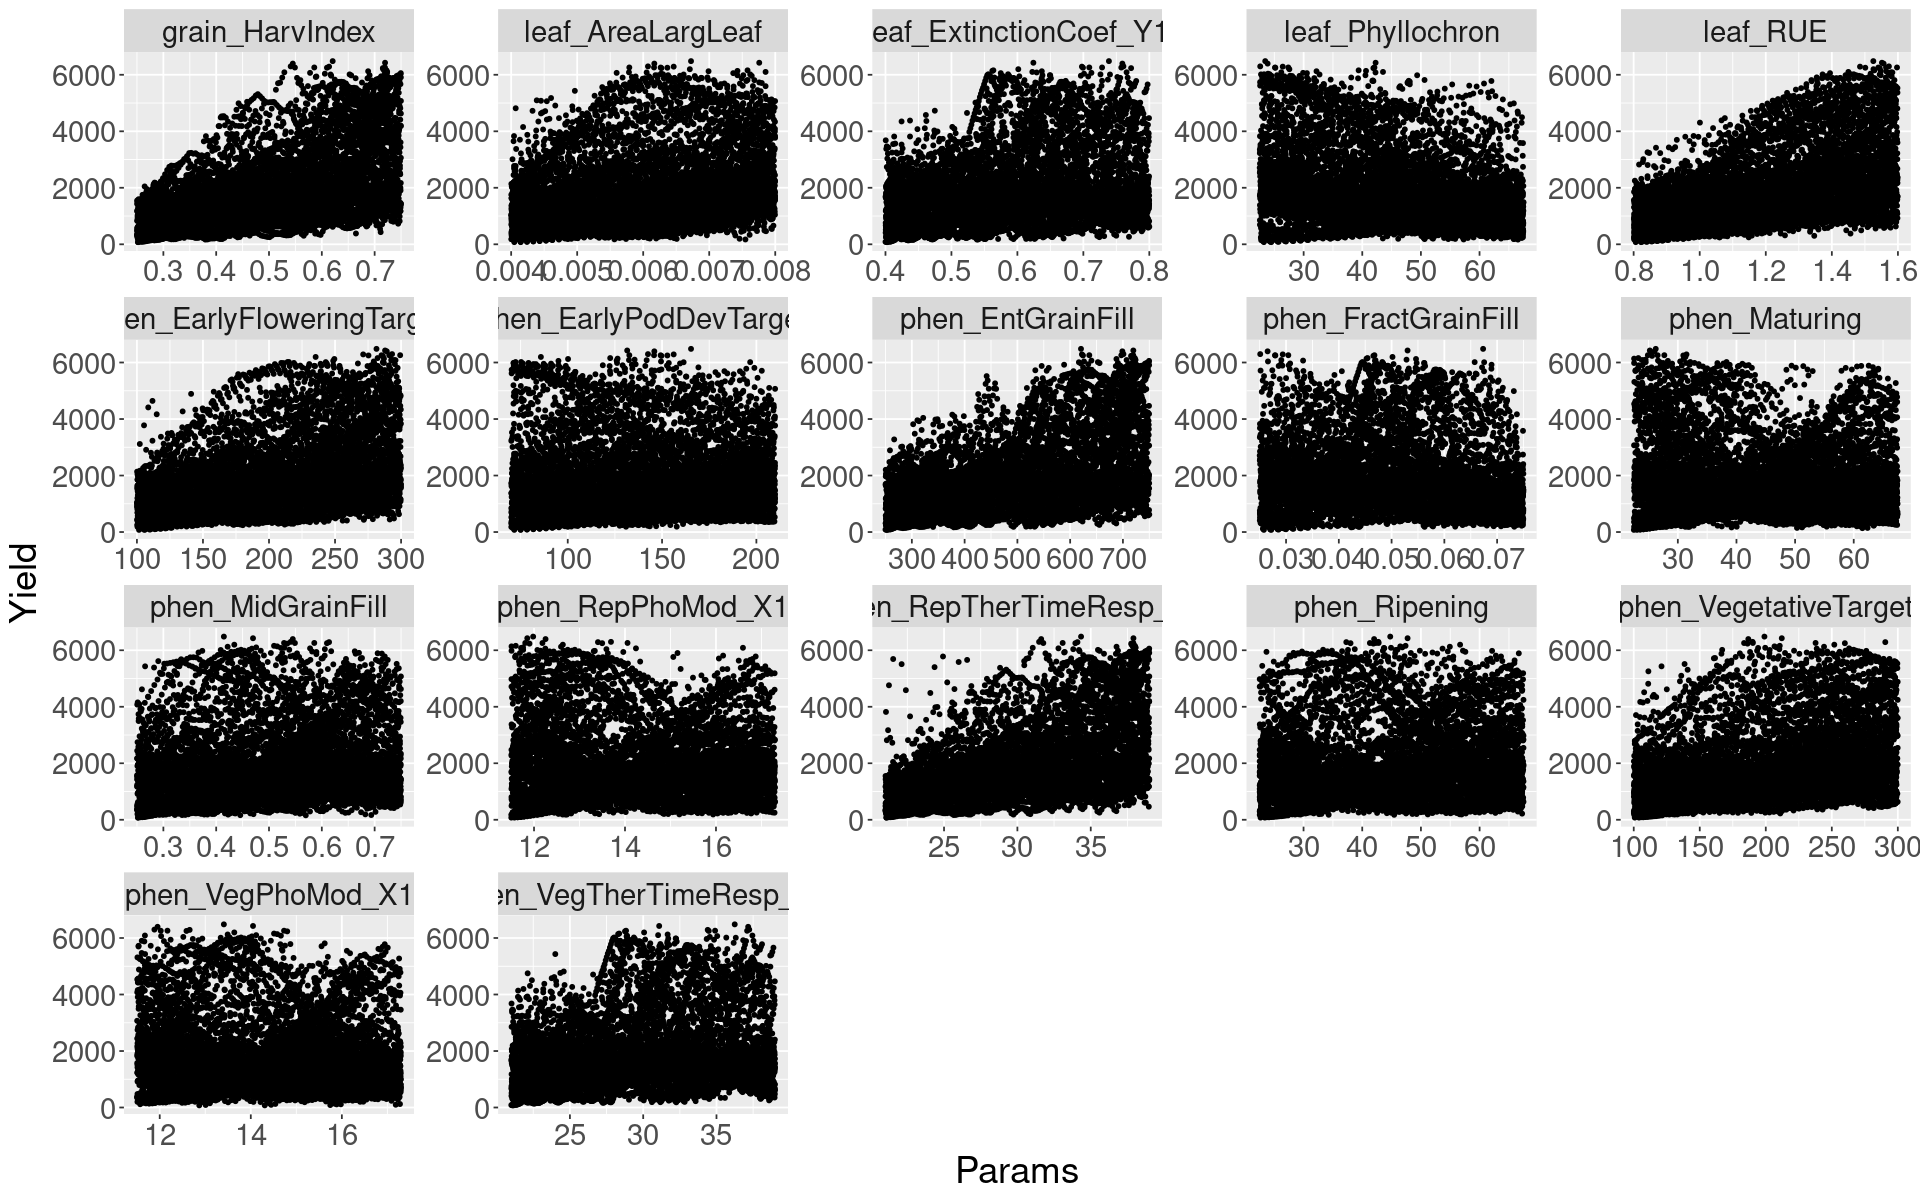

In [8]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(data = merged, aes(x = value, y = yield)) +
  geom_point(size = 1) +
  facet_wrap(variable ~ ., scales = "free") +

  scale_y_continuous(name = "Yield") +
  scale_x_continuous(name = "Params") +
  
  # geom_smooth(formula = y~x, method = "auto", se = FALSE, fullrange = TRUE, size = 4) +
  # stat_regline_equation(label.x=x_labels, label.y=y_positions, size=5, show.legend = FALSE) + 
  # stat_cor(method = "pearson", label.x=x_cor, label.y=y_positions, size=5, show.legend = FALSE, p.accuracy = 0.001, r.accuracy = 0.01) +
  
  # geom_abline(intercept = 0, slope = 1) +
  theme(
    legend.position = "bottom",
    text = element_text(size = 22)
  )